In [646]:
import networkx as nx
import matplotlib.pyplot as plt
import random

1.	Построить три графа (размерностью не 100 вершин каждый): случайный граф, самоподобный граф, граф малого мира.

In [693]:
def remove_ten_percent_edges(G):
    G = G.copy()
    list_edges = list(nx.edges(G))

    count_to_delete = round((len(list_edges)*10)/100)
    edges_to_delete = random.sample(list_edges, count_to_delete)

    for i in edges_to_delete:
        G.remove_edge(*i)
        

In [729]:
random_G=nx.random_geometric_graph(100,0.20, seed=2)
pos=nx.get_node_attributes(random_G,'pos')

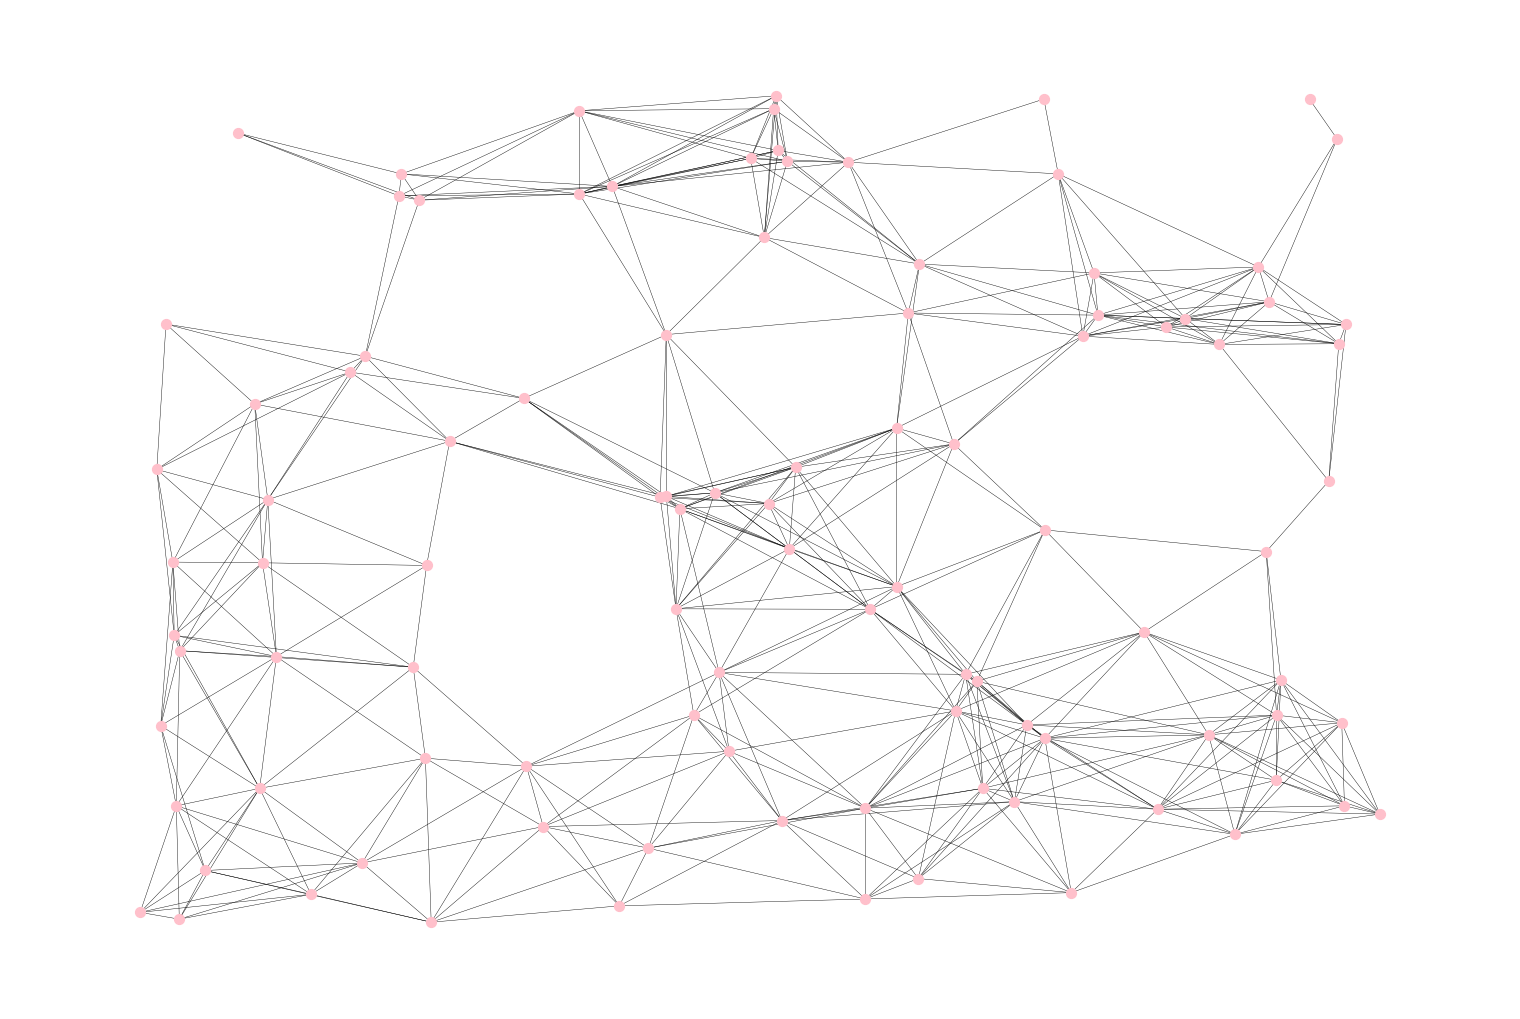

In [730]:
plt.figure(figsize=(15,10))
nx.draw(random_G,pos=pos, with_labels=False, node_size=50, width=0.3, node_color='pink')

Радиус графа

In [731]:
nx.radius(random_G)

5

Диаметр графа

In [732]:
nx.diameter(random_G)

9

Эксцентриситеты для каждой вершины

In [733]:
for key, value in dict(nx.eccentricity(random_G)).items():
    print("{0}: {1}".format(key,value), end=', ')

0: 8, 1: 9, 2: 7, 3: 6, 4: 5, 5: 7, 6: 6, 7: 8, 8: 8, 9: 7, 10: 9, 11: 6, 12: 6, 13: 5, 14: 8, 15: 8, 16: 7, 17: 7, 18: 7, 19: 7, 20: 7, 21: 7, 22: 8, 23: 6, 24: 5, 25: 7, 26: 7, 27: 6, 28: 7, 29: 7, 30: 6, 31: 8, 32: 7, 33: 7, 34: 8, 35: 8, 36: 5, 37: 6, 38: 7, 39: 7, 40: 7, 41: 7, 42: 8, 43: 8, 44: 6, 45: 7, 46: 7, 47: 7, 48: 7, 49: 6, 50: 8, 51: 7, 52: 8, 53: 8, 54: 9, 55: 7, 56: 7, 57: 8, 58: 8, 59: 8, 60: 6, 61: 8, 62: 8, 63: 7, 64: 7, 65: 7, 66: 7, 67: 6, 68: 8, 69: 8, 70: 6, 71: 7, 72: 8, 73: 5, 74: 8, 75: 9, 76: 9, 77: 7, 78: 7, 79: 9, 80: 7, 81: 6, 82: 6, 83: 6, 84: 5, 85: 9, 86: 8, 87: 7, 88: 9, 89: 8, 90: 5, 91: 6, 92: 7, 93: 8, 94: 5, 95: 8, 96: 6, 97: 8, 98: 7, 99: 7, 

Меры доступности

In [785]:
def metrics(G):
    G = G.copy()
    nodes = 100
    summa_si_index = 0
    si_index_list = []
    si_index_dict = {}
    ki_index_dict = {}
    ba_index_dict = {}
    bi_index_dict = {}
    
    '''По абсолютным индексам центральное положение занимают объекты с наименьшими их величинами'''
    for i, v in list(nx.shortest_path_length(G)):
        print(f'Si index {i} {v}')
        si_index = sum(v.values())
        ki_index = max(v.values())
        print(f'Сумма инцидентных ребер для вершины {i} = {si_index}')
        si_index_dict[i] = si_index
        si_index_list.append(si_index)
        summa_si_index+=si_index
        ki_index_dict[i] = ki_index
    #'''Кенига (Ki) – это наибольший по величине элемент (xi)  строки матрицы'''
        print(f'Ki index {ki_index}')
    print(f' Si index меры (отсортированные): {dict(sorted(si_index_dict.items(), key=lambda item: item[1]))}')
    print(f' Ki index меры (отсортированные): {dict(sorted(ki_index_dict.items(), key=lambda item: item[1]))}')
        
        
    print(f'Сумма si индексов {summa_si_index}')
    '''Максимальное значение индекса Бавелаша указывает на высокую степень доступности вершин. '''
    print('Индекс Бавелаша:')
    for i, si in zip(range(100), si_index_list):
        ba_index = round(summa_si_index/si, 2)
        print(i , ba_index)
        ba_index_dict[i] = ba_index
    print(f' Ba index меры (отсортированные): \
          {dict(sorted(ba_index_dict.items(), key=lambda item: item[1], reverse=True))}')

    print('Индекс Бошама:')
    for i, si in zip(range(100), si_index_list):
        bi_index = round((nodes-1)/si,4)
        print(i , bi_index)
        bi_index_dict[i] = bi_index
    print(f' Bi index меры (отсортированные): \
          {dict(sorted(bi_index_dict.items(), key=lambda item: item[1], reverse=True))}')

    

In [735]:
def connectivity(G):
    G = G.copy()
    i = nx.number_connected_components(G)
    m = len(G.edges())
    n = len(G.nodes())
    alpha = (m-n+i)/((2*n-5))
    betta = m/n
    gamma = m/(3*(n-2))
    print(f'alpha - {alpha}, betta = {betta}, gamma - {gamma}')

In [759]:
def forms(G):
    G = G.copy()
    d = nx.diameter(G)
    m = len(G.edges())
    form = m/d
    print(f'forms: {form}') 

In [772]:
def centrality(G):
    G = G.copy()
    degree_centrality = nx.degree_centrality(G)
    degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))
    closeness_centrality = nx.closeness_centrality(G)
    closeness_centrality = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
    betweenness_centrality = nx.betweenness_centrality(G)
    betweenness_centrality = dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))
    eigen_centrality = nx.eigenvector_centrality(G)
    eigen_centrality = dict(sorted(eigen_centrality.items(), key=lambda item: item[1], reverse=True))
    print('Degree centrality:')
    for i, v in degree_centrality.items():
        print(i, round(v,2))
    '''показатель СС можно рассчитать только для связного графа'''
    print('Closeness centrality:')
    for i, v in closeness_centrality.items():
        print(i, round(v,2))
    print('Betweenness centrality:')
    for i, v in betweenness_centrality.items():
        print(i, round(v,2))
    print('Eigenvector centrality:')
    for i, v in eigen_centrality.items():
        print(i, round(v,2))

In [773]:
metrics(random_G)

connectivity(random_G)

forms(random_G)

centrality(random_G)

Si index 0 {0: 0, 64: 1, 18: 1, 79: 1, 65: 2, 2: 2, 35: 2, 41: 2, 19: 2, 20: 2, 23: 2, 93: 2, 63: 2, 4: 3, 37: 3, 7: 3, 8: 3, 29: 3, 82: 3, 60: 3, 12: 4, 13: 4, 16: 4, 24: 4, 25: 4, 26: 4, 28: 4, 30: 4, 36: 4, 39: 4, 49: 4, 73: 4, 78: 4, 84: 4, 90: 4, 94: 4, 99: 4, 3: 5, 6: 5, 11: 5, 21: 5, 27: 5, 33: 5, 34: 5, 44: 5, 45: 5, 48: 5, 67: 5, 70: 5, 81: 5, 83: 5, 91: 5, 92: 5, 96: 5, 98: 5, 5: 6, 9: 6, 17: 6, 22: 6, 32: 6, 38: 6, 40: 6, 42: 6, 46: 6, 47: 6, 51: 6, 52: 6, 55: 6, 56: 6, 58: 6, 66: 6, 69: 6, 71: 6, 72: 6, 77: 6, 80: 6, 87: 6, 14: 7, 15: 7, 31: 7, 43: 7, 50: 7, 53: 7, 57: 7, 59: 7, 61: 7, 62: 7, 68: 7, 74: 7, 86: 7, 89: 7, 95: 7, 97: 7, 1: 8, 10: 8, 54: 8, 75: 8, 76: 8, 85: 8, 88: 8}
Сумма инцидентных ребер для вершины 0 = 500
Ki index 8
Si index 1 {1: 0, 97: 1, 10: 1, 75: 1, 76: 1, 14: 1, 85: 1, 54: 1, 88: 1, 15: 2, 31: 2, 38: 2, 50: 2, 57: 2, 59: 2, 61: 2, 62: 2, 86: 2, 89: 2, 5: 3, 9: 3, 11: 3, 46: 3, 66: 3, 68: 3, 71: 3, 74: 3, 77: 3, 80: 3, 95: 3, 3: 4, 6: 4, 17: 4, 32: 4

Удалим 10% вершин и снова посмотрим результаты

In [774]:
remove_ten_percent_edges(random_G)

In [775]:
nx.radius(random_G)

5

In [776]:
nx.diameter(random_G)

9

In [777]:
for key, value in dict(nx.eccentricity(random_G)).items():
    print("{0}: {1}".format(key,value), end=', ')

0: 8, 1: 9, 2: 7, 3: 6, 4: 5, 5: 7, 6: 6, 7: 8, 8: 8, 9: 7, 10: 9, 11: 6, 12: 6, 13: 5, 14: 8, 15: 8, 16: 7, 17: 7, 18: 7, 19: 7, 20: 7, 21: 7, 22: 8, 23: 6, 24: 5, 25: 7, 26: 7, 27: 6, 28: 7, 29: 7, 30: 6, 31: 8, 32: 7, 33: 7, 34: 8, 35: 8, 36: 5, 37: 6, 38: 7, 39: 7, 40: 7, 41: 7, 42: 8, 43: 8, 44: 6, 45: 7, 46: 7, 47: 7, 48: 7, 49: 6, 50: 8, 51: 7, 52: 8, 53: 8, 54: 9, 55: 7, 56: 7, 57: 8, 58: 8, 59: 8, 60: 6, 61: 8, 62: 8, 63: 7, 64: 7, 65: 7, 66: 7, 67: 6, 68: 8, 69: 8, 70: 6, 71: 7, 72: 8, 73: 5, 74: 8, 75: 9, 76: 9, 77: 7, 78: 7, 79: 9, 80: 7, 81: 6, 82: 6, 83: 6, 84: 5, 85: 9, 86: 8, 87: 7, 88: 9, 89: 8, 90: 5, 91: 6, 92: 7, 93: 8, 94: 5, 95: 8, 96: 6, 97: 8, 98: 7, 99: 7, 

In [778]:
metrics(random_G)

connectivity(random_G)

forms(random_G)

centrality(random_G)

Si index 0 {0: 0, 64: 1, 18: 1, 79: 1, 65: 2, 2: 2, 35: 2, 41: 2, 19: 2, 20: 2, 23: 2, 93: 2, 63: 2, 4: 3, 37: 3, 7: 3, 8: 3, 29: 3, 82: 3, 60: 3, 12: 4, 13: 4, 16: 4, 24: 4, 25: 4, 26: 4, 28: 4, 30: 4, 36: 4, 39: 4, 49: 4, 73: 4, 78: 4, 84: 4, 90: 4, 94: 4, 99: 4, 3: 5, 6: 5, 11: 5, 21: 5, 27: 5, 33: 5, 34: 5, 44: 5, 45: 5, 48: 5, 67: 5, 70: 5, 81: 5, 83: 5, 91: 5, 92: 5, 96: 5, 98: 5, 5: 6, 9: 6, 17: 6, 22: 6, 32: 6, 38: 6, 40: 6, 42: 6, 46: 6, 47: 6, 51: 6, 52: 6, 55: 6, 56: 6, 58: 6, 66: 6, 69: 6, 71: 6, 72: 6, 77: 6, 80: 6, 87: 6, 14: 7, 15: 7, 31: 7, 43: 7, 50: 7, 53: 7, 57: 7, 59: 7, 61: 7, 62: 7, 68: 7, 74: 7, 86: 7, 89: 7, 95: 7, 97: 7, 1: 8, 10: 8, 54: 8, 75: 8, 76: 8, 85: 8, 88: 8}
Сумма инцидентных ребер для вершины 0 = 500
Ki index 8
Si index 1 {1: 0, 97: 1, 10: 1, 75: 1, 76: 1, 14: 1, 85: 1, 54: 1, 88: 1, 15: 2, 31: 2, 38: 2, 50: 2, 57: 2, 59: 2, 61: 2, 62: 2, 86: 2, 89: 2, 5: 3, 9: 3, 11: 3, 46: 3, 66: 3, 68: 3, 71: 3, 74: 3, 77: 3, 80: 3, 95: 3, 3: 4, 6: 4, 17: 4, 32: 4

In [779]:
small_world_G=nx.watts_strogatz_graph(100, 5, 0.5, seed=4)
pos = nx.circular_layout(small_world_G)


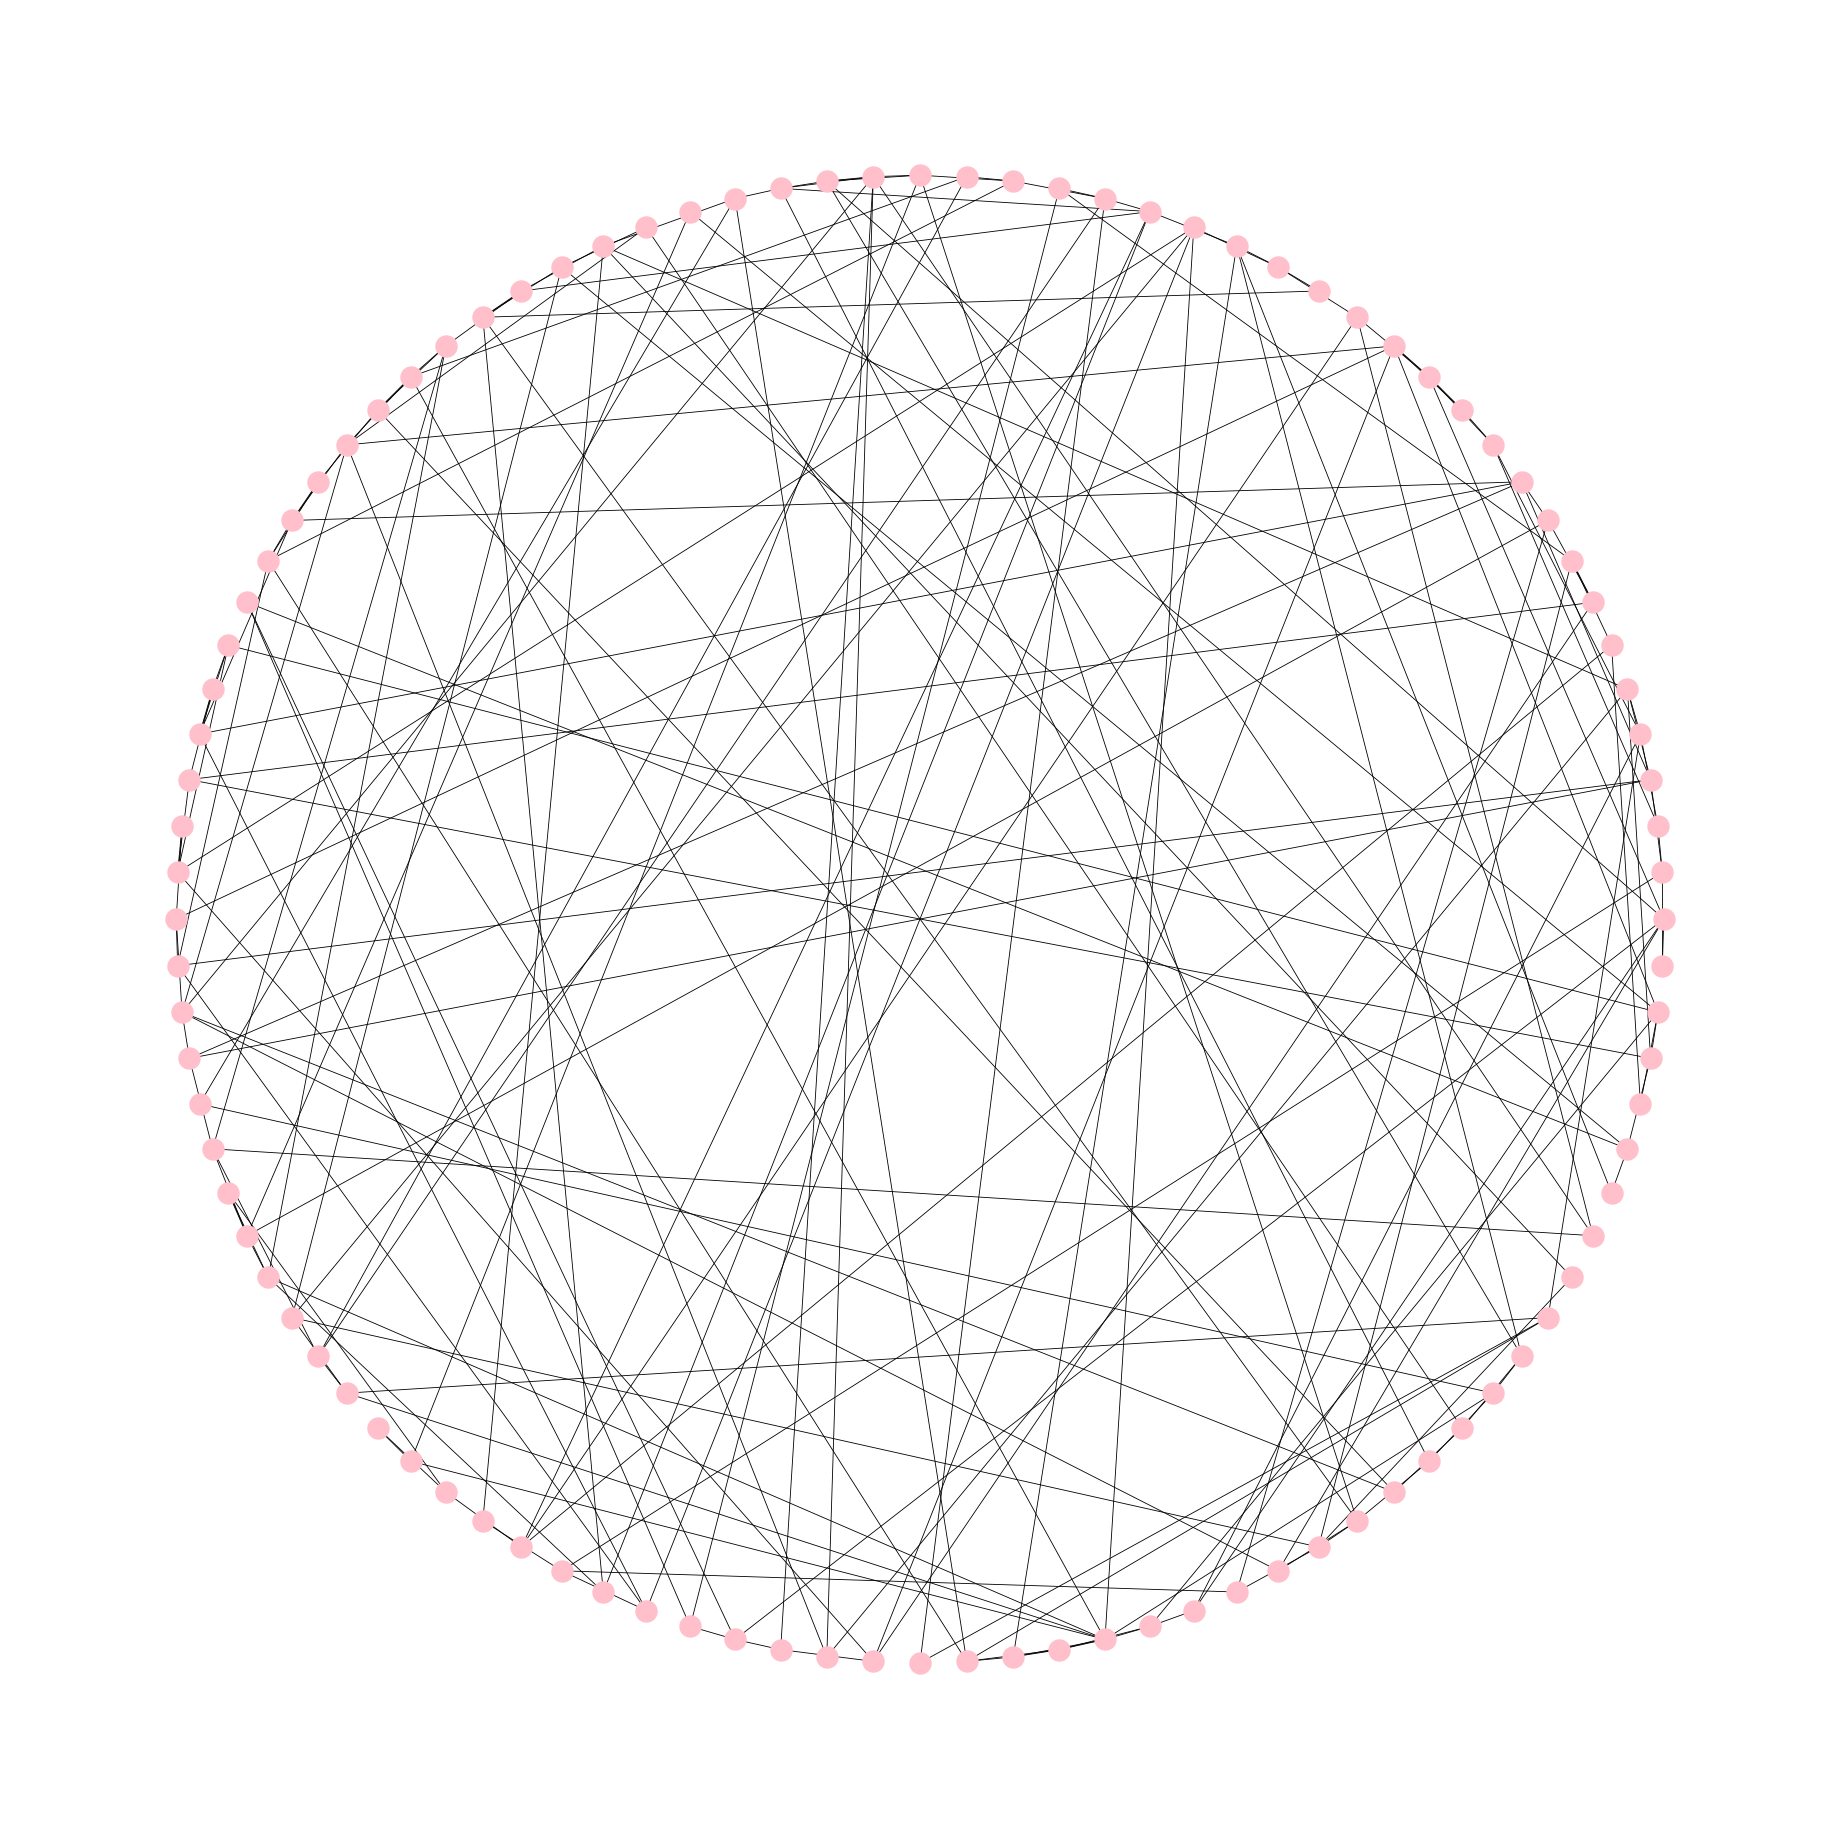

In [780]:
plt.figure(figsize=(9,9), dpi=200)
nx.draw(small_world_G, pos=pos, node_size=50, width=0.3, node_color='pink')

In [666]:
print(nx.radius(small_world_G))

print(nx.diameter(small_world_G))

for key, value in dict(nx.eccentricity(random_G)).items():
    print("{0}: {1}".format(key,value), end=', ')



5
6
0: 8, 1: 9, 2: 7, 3: 6, 4: 5, 5: 7, 6: 6, 7: 8, 8: 8, 9: 7, 10: 9, 11: 6, 12: 6, 13: 5, 14: 8, 15: 8, 16: 7, 17: 7, 18: 7, 19: 7, 20: 7, 21: 7, 22: 8, 23: 6, 24: 5, 25: 7, 26: 7, 27: 6, 28: 7, 29: 7, 30: 6, 31: 8, 32: 7, 33: 7, 34: 8, 35: 8, 36: 5, 37: 6, 38: 7, 39: 7, 40: 7, 41: 7, 42: 8, 43: 8, 44: 6, 45: 7, 46: 7, 47: 7, 48: 7, 49: 6, 50: 8, 51: 7, 52: 8, 53: 8, 54: 9, 55: 7, 56: 7, 57: 8, 58: 8, 59: 8, 60: 6, 61: 8, 62: 8, 63: 7, 64: 7, 65: 7, 66: 7, 67: 6, 68: 8, 69: 8, 70: 6, 71: 7, 72: 8, 73: 5, 74: 8, 75: 9, 76: 9, 77: 7, 78: 7, 79: 9, 80: 7, 81: 6, 82: 6, 83: 6, 84: 5, 85: 9, 86: 8, 87: 7, 88: 9, 89: 8, 90: 5, 91: 6, 92: 7, 93: 8, 94: 5, 95: 8, 96: 6, 97: 8, 98: 7, 99: 7, 

In [790]:
metrics(G)
connectivity(G)
forms(G)
centrality(G)

Si index 0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 7: 1, 9: 1, 6: 2, 8: 2}
Сумма инцидентных ребер для вершины 0 = 11
Ki index 2
Si index 1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 1, 8: 1, 5: 2, 6: 2, 7: 2, 9: 2}
Сумма инцидентных ребер для вершины 1 = 13
Ki index 2
Si index 2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 1, 5: 1, 6: 1, 8: 1, 7: 2, 9: 2}
Сумма инцидентных ребер для вершины 2 = 11
Ki index 2
Si index 3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
Сумма инцидентных ребер для вершины 3 = 9
Ki index 1
Si index 4 {4: 0, 0: 1, 1: 1, 2: 1, 3: 1, 5: 1, 7: 1, 6: 2, 8: 2, 9: 2}
Сумма инцидентных ребер для вершины 4 = 12
Ki index 2
Si index 5 {5: 0, 0: 1, 2: 1, 3: 1, 4: 1, 1: 2, 6: 2, 7: 2, 8: 2, 9: 2}
Сумма инцидентных ребер для вершины 5 = 14
Ki index 2
Si index 6 {6: 0, 2: 1, 3: 1, 0: 2, 1: 2, 4: 2, 5: 2, 7: 2, 8: 2, 9: 2}
Сумма инцидентных ребер для вершины 6 = 16
Ki index 2
Si index 7 {7: 0, 0: 1, 9: 1, 3: 1, 4: 1, 1: 2, 2: 2, 5: 2, 6: 2, 8: 2}
Сумма инцидентных ребер для вершины 7 = 14
Ki i

In [782]:
remove_ten_percent_edges(small_world_G)

In [783]:
print(nx.radius(small_world_G))

print(nx.diameter(small_world_G))

for key, value in dict(nx.eccentricity(random_G)).items():
    print("{0}: {1}".format(key,value), end=', ')

5
6
0: 8, 1: 9, 2: 7, 3: 6, 4: 5, 5: 7, 6: 6, 7: 8, 8: 8, 9: 7, 10: 9, 11: 6, 12: 6, 13: 5, 14: 8, 15: 8, 16: 7, 17: 7, 18: 7, 19: 7, 20: 7, 21: 7, 22: 8, 23: 6, 24: 5, 25: 7, 26: 7, 27: 6, 28: 7, 29: 7, 30: 6, 31: 8, 32: 7, 33: 7, 34: 8, 35: 8, 36: 5, 37: 6, 38: 7, 39: 7, 40: 7, 41: 7, 42: 8, 43: 8, 44: 6, 45: 7, 46: 7, 47: 7, 48: 7, 49: 6, 50: 8, 51: 7, 52: 8, 53: 8, 54: 9, 55: 7, 56: 7, 57: 8, 58: 8, 59: 8, 60: 6, 61: 8, 62: 8, 63: 7, 64: 7, 65: 7, 66: 7, 67: 6, 68: 8, 69: 8, 70: 6, 71: 7, 72: 8, 73: 5, 74: 8, 75: 9, 76: 9, 77: 7, 78: 7, 79: 9, 80: 7, 81: 6, 82: 6, 83: 6, 84: 5, 85: 9, 86: 8, 87: 7, 88: 9, 89: 8, 90: 5, 91: 6, 92: 7, 93: 8, 94: 5, 95: 8, 96: 6, 97: 8, 98: 7, 99: 7, 

In [786]:
metrics(G)
connectivity(G)
forms(G)
centrality(G)

Si index 0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 7: 1, 9: 1, 6: 2, 8: 2}
Сумма инцидентных ребер для вершины 0 = 11
Ki index 2
Si index 1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 1, 8: 1, 5: 2, 6: 2, 7: 2, 9: 2}
Сумма инцидентных ребер для вершины 1 = 13
Ki index 2
Si index 2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 1, 5: 1, 6: 1, 8: 1, 7: 2, 9: 2}
Сумма инцидентных ребер для вершины 2 = 11
Ki index 2
Si index 3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
Сумма инцидентных ребер для вершины 3 = 9
Ki index 1
Si index 4 {4: 0, 0: 1, 1: 1, 2: 1, 3: 1, 5: 1, 7: 1, 6: 2, 8: 2, 9: 2}
Сумма инцидентных ребер для вершины 4 = 12
Ki index 2
Si index 5 {5: 0, 0: 1, 2: 1, 3: 1, 4: 1, 1: 2, 6: 2, 7: 2, 8: 2, 9: 2}
Сумма инцидентных ребер для вершины 5 = 14
Ki index 2
Si index 6 {6: 0, 2: 1, 3: 1, 0: 2, 1: 2, 4: 2, 5: 2, 7: 2, 8: 2, 9: 2}
Сумма инцидентных ребер для вершины 6 = 16
Ki index 2
Si index 7 {7: 0, 0: 1, 9: 1, 3: 1, 4: 1, 1: 2, 2: 2, 5: 2, 6: 2, 8: 2}
Сумма инцидентных ребер для вершины 7 = 14
Ki i

1.	Построить случайный граф размерностью не менее 500 вершин.
2.	Визуализировать граф, используя стандартные функции библиотеки networkx.
3.	Визуализировать граф из п.1 по следующему принципу:
вершины с большими степенями должны находиться ближе к центру окружности.
4.	Построить предфрактальный граф размерностью не менее 500 вершин.
5.	Выполнить пп.2-3 для построенного предфрактального графа


In [787]:
def plot_graph_center(G):
    G = G.copy()
    random_smol_nodes = {node: val for (node, val) in G.degree()} 

    sorted_smol_random_nodes = sorted(list(random_smol_nodes.keys()),key=lambda node: random_smol_nodes[node],reverse=True)
    print(sorted_smol_random_nodes)


    sorted_smol_pos = nx.spiral_layout(sorted_smol_random_nodes)


    fig, ax = plt.subplots(figsize=(16, 16)) 
    nx.draw(G, pos=sorted_smol_pos, node_size=10, width=0.1, node_color='pink')

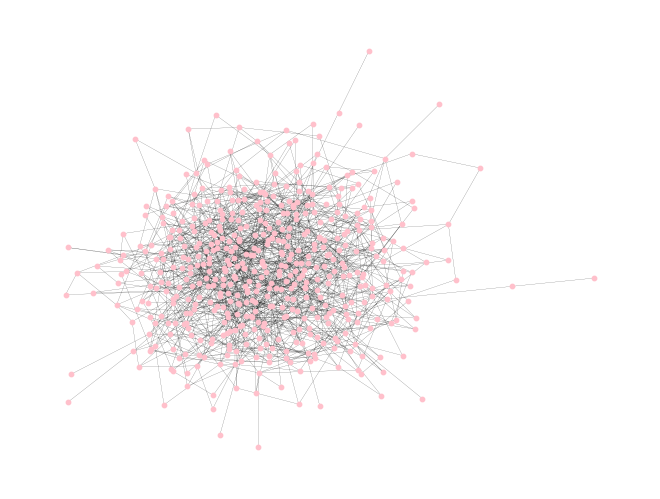

In [788]:
random_G=nx.gnm_random_graph(499,1300, seed=4)
pos = nx.spring_layout(random_G)
nx.draw(random_G, pos=pos, with_labels=False, node_size=10, width=0.1, node_color='pink')

[293, 161, 338, 408, 482, 83, 186, 198, 449, 16, 31, 86, 87, 90, 225, 271, 306, 382, 13, 36, 49, 133, 139, 241, 247, 278, 317, 319, 345, 346, 374, 386, 396, 441, 455, 489, 2, 22, 41, 47, 59, 78, 80, 82, 85, 96, 97, 100, 113, 134, 146, 224, 245, 253, 260, 268, 275, 279, 312, 323, 331, 343, 357, 367, 377, 383, 401, 432, 433, 451, 452, 459, 460, 472, 475, 1, 18, 34, 39, 69, 71, 76, 88, 94, 107, 108, 109, 121, 127, 132, 143, 147, 151, 153, 155, 158, 164, 167, 170, 173, 177, 178, 185, 188, 190, 200, 206, 208, 223, 239, 250, 261, 265, 269, 304, 307, 309, 318, 321, 333, 361, 363, 364, 373, 388, 402, 404, 410, 419, 429, 437, 443, 445, 469, 471, 474, 491, 492, 494, 9, 17, 28, 32, 44, 67, 84, 99, 102, 110, 112, 117, 119, 128, 130, 131, 135, 148, 149, 152, 156, 165, 169, 176, 182, 187, 202, 203, 205, 220, 221, 227, 231, 244, 259, 262, 266, 272, 285, 292, 296, 320, 328, 342, 344, 350, 353, 362, 375, 380, 389, 392, 409, 418, 422, 423, 427, 428, 439, 448, 456, 461, 467, 473, 479, 486, 498, 10, 15, 1

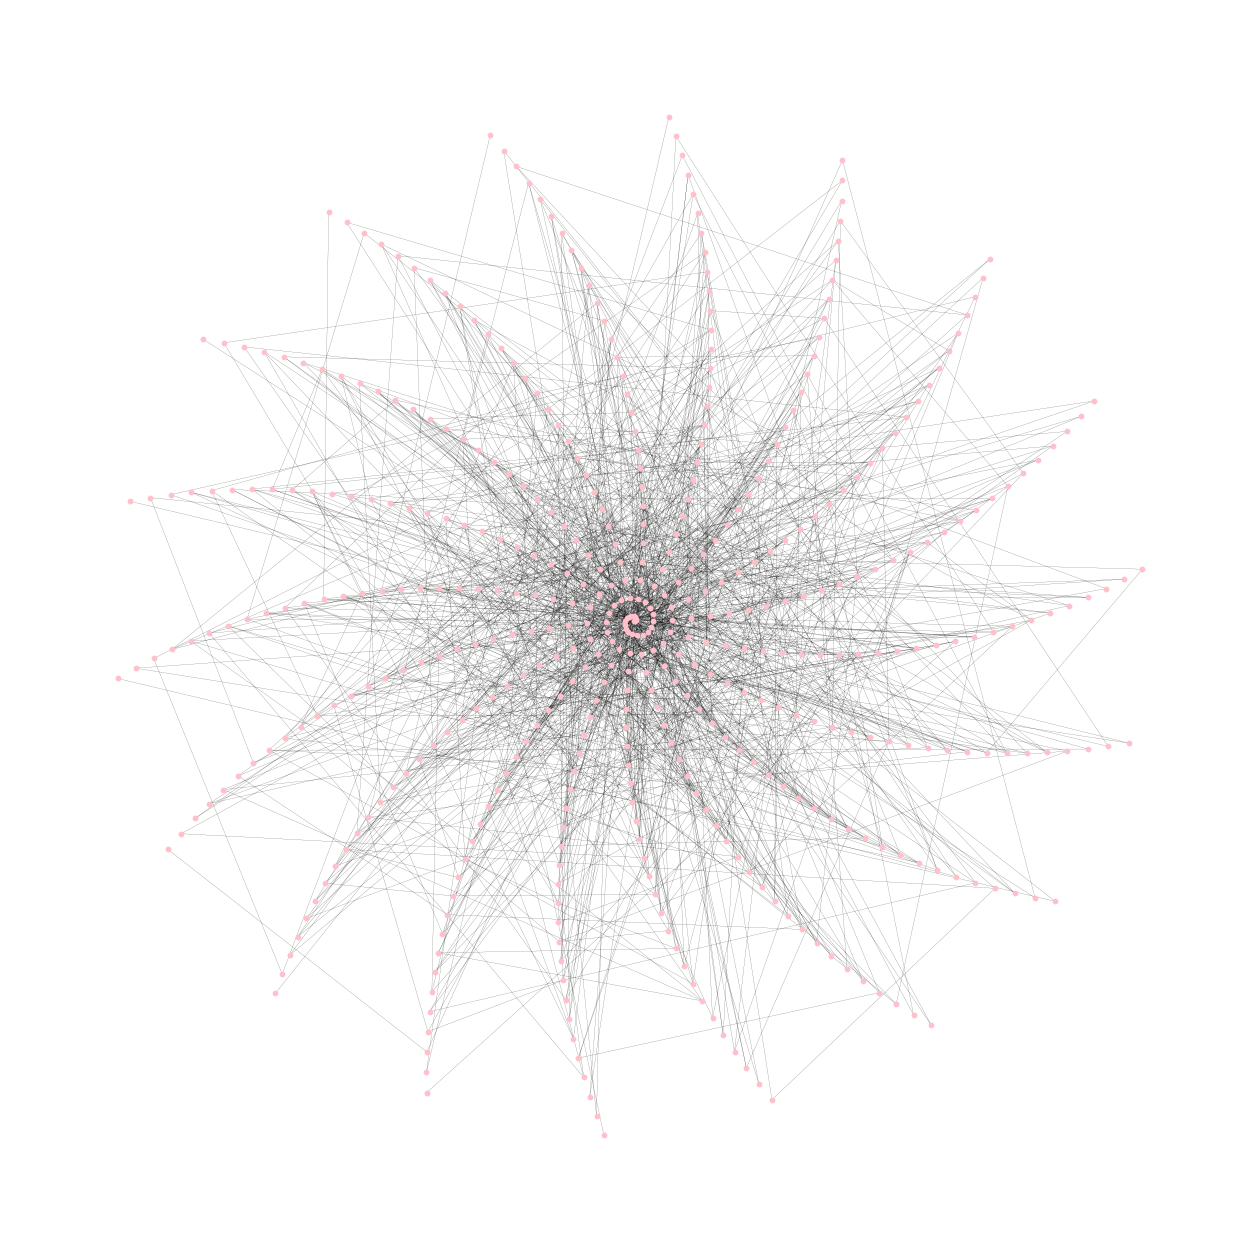

In [789]:
plot_graph_center(random_G)